In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data1 = pd.read_csv("Groceries_dataset.csv")
data1.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<BarContainer object of 3898 artists>

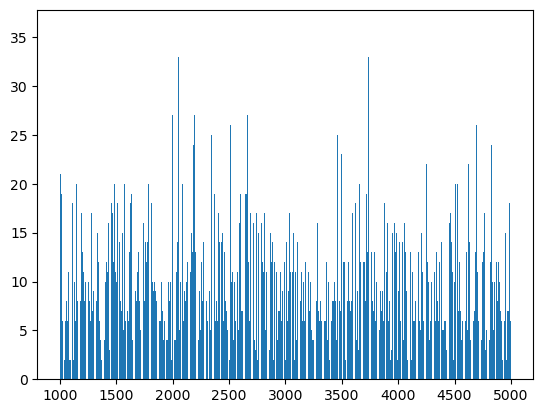

In [4]:
counts = data1['Member_number'].value_counts()

plt.bar(counts.index, counts.values)

<BarContainer object of 728 artists>

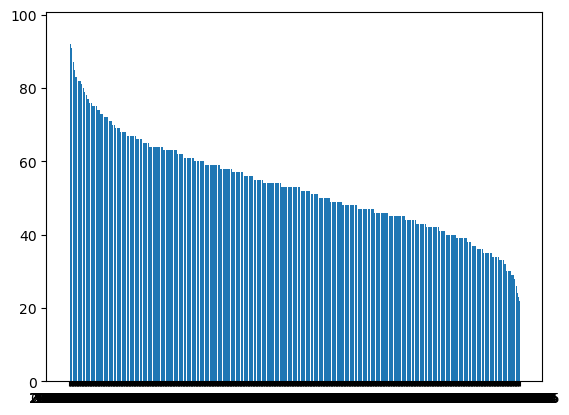

In [5]:
counts = data1['Date'].value_counts()

plt.bar(counts.index, counts.values)

In [6]:
df=pd.get_dummies(data1, dtype=int)
df.head()

,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Columns: 896 entries, Member_number to itemDescription_zwieback
dtypes: int32(895), int64(1)
memory usage: 132.6 MB


In [8]:
print(df.nunique().unique())  # Should return [2] if all values are 0 or 1


[3898    2]


In [9]:
import pandas as pd

# Load the dataset (Make sure the file path is correct)
df = pd.read_csv("Groceries_dataset.csv")

# Display the first few rows
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [10]:
print(type(df))  # Should return <class 'pandas.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [11]:
print(df.isnull().sum().sum())  # Should return 0 if no missing values


0


In [12]:
df_basket = df.pivot_table(index="Member_number", columns="itemDescription", aggfunc=lambda x: 1, fill_value=0)

# Convert data to binary (0/1)
df_basket = df_basket.astype(int)

# Verify it's properly created
print(df_basket.head())


                                 Date                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Member_number                                                     
1000                                0        0                0   
1001                                0        0                0   
1002                                0        0                0   
1003                                0        0                0   
1004                                0        0                0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Member_number                                                        
1000                           0              0    0             0   
1001                           0              0    0             0   
1002                           0              0    0             0   
1003                           0           

In [13]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)
print(frequent_itemsets)


      support                                           itemsets
0    0.078502                                 ((Date, UHT-milk))
1    0.119548                                     ((Date, beef))
2    0.079785                                  ((Date, berries))
3    0.062083                                ((Date, beverages))
4    0.158799                             ((Date, bottled beer))
..        ...                                                ...
160  0.050539  ((Date, whole milk), (Date, other vegetables),...
161  0.071832  ((Date, yogurt), (Date, whole milk), (Date, ot...
162  0.065162  ((Date, rolls/buns), (Date, whole milk), (Date...
163  0.065931  ((Date, yogurt), (Date, rolls/buns), (Date, wh...
164  0.054387  ((Date, yogurt), (Date, whole milk), (Date, so...

[165 rows x 2 columns]


C:\Users\Adapa Ved\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the rules
print(rules)

                            antecedents                           consequents  \
0            ((Date, other vegetables))                        ((Date, beef))   
1                        ((Date, beef))            ((Date, other vegetables))   
2                  ((Date, whole milk))                        ((Date, beef))   
3                        ((Date, beef))                  ((Date, whole milk))   
4                ((Date, bottled beer))            ((Date, other vegetables))   
..                                  ...                                   ...   
253      ((Date, yogurt), (Date, soda))                  ((Date, whole milk))   
254  ((Date, whole milk), (Date, soda))                      ((Date, yogurt))   
255                    ((Date, yogurt))    ((Date, whole milk), (Date, soda))   
256                ((Date, whole milk))        ((Date, yogurt), (Date, soda))   
257                      ((Date, soda))  ((Date, yogurt), (Date, whole milk))   

     antecedent support  co

In [15]:
rules.sort_values(by='lift', ascending=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
113,"((Date, tropical fruit))","((Date, other vegetables))",0.233710,0.376603,0.091329,0.390779,1.037642,1.0,0.003313,1.023269,0.047340,0.175976,0.022740,0.316643
112,"((Date, other vegetables))","((Date, tropical fruit))",0.376603,0.233710,0.091329,0.242507,1.037642,1.0,0.003313,1.011614,0.058191,0.175976,0.011480,0.316643
58,"((Date, whole milk))","((Date, coffee))",0.458184,0.114931,0.055156,0.120381,1.047420,1.0,0.002497,1.006196,0.083558,0.106488,0.006158,0.300146
59,"((Date, coffee))","((Date, whole milk))",0.114931,0.458184,0.055156,0.479911,1.047420,1.0,0.002497,1.041776,0.051152,0.106488,0.040100,0.300146
111,"((Date, soda))","((Date, other vegetables))",0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,"((Date, yogurt))","((Date, whole milk), (Date, other vegetables))",0.282966,0.191380,0.071832,0.253853,1.326434,1.0,0.017678,1.083727,0.343217,0.178458,0.077259,0.314594
192,"((Date, whole milk), (Date, bottled water))","((Date, other vegetables))",0.112365,0.376603,0.056183,0.500000,1.327657,1.0,0.013865,1.246793,0.278035,0.129816,0.197942,0.324591
197,"((Date, other vegetables))","((Date, whole milk), (Date, bottled water))",0.376603,0.112365,0.056183,0.149183,1.327657,1.0,0.013865,1.043273,0.395885,0.129816,0.041478,0.324591
193,"((Date, whole milk), (Date, other vegetables))","((Date, bottled water))",0.191380,0.213699,0.056183,0.293566,1.373732,1.0,0.015285,1.113056,0.336445,0.161029,0.101572,0.278235


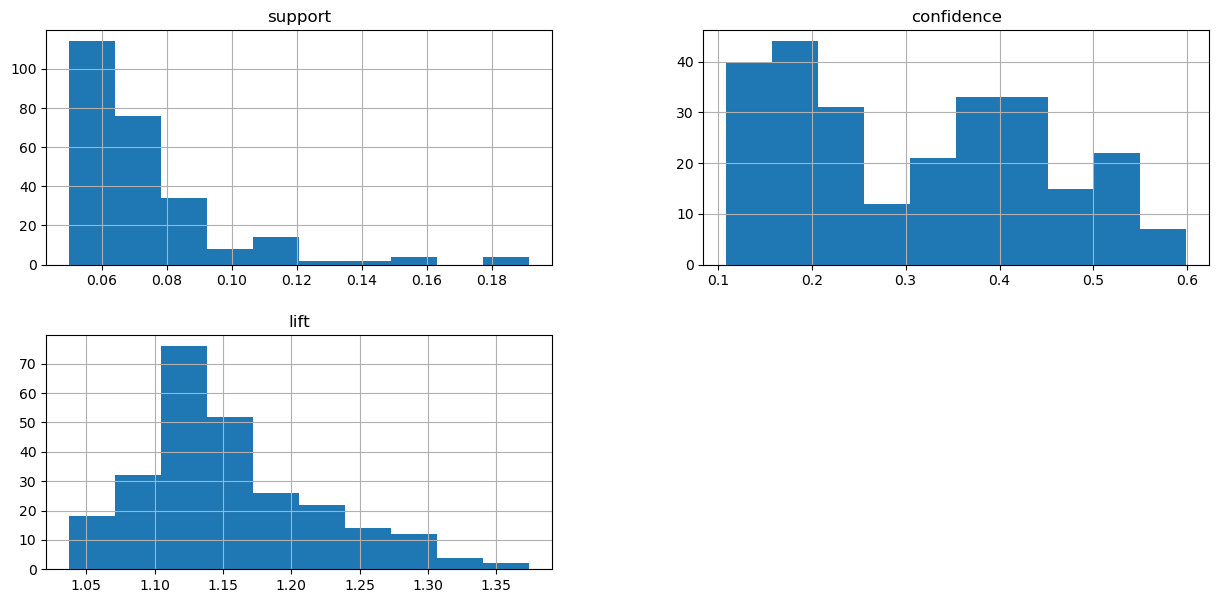

In [16]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df_basket, cmap='YlGnBu', annot=True, cbar=False, fmt='d')

# Customize the plot
plt.title("Heatmap of Item Purchases")
plt.xlabel("Items")
plt.ylabel("Member Numbers (Transactions)")

# Show the plot
plt.show()
